In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
%matplotlib inline 
#new stuff 7/9 for automating process
import os
import os.path
from pathlib2 import Path
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'font.weight':'medium', 
         'xtick.major.size':8,
         'ytick.major.size':8}
pylab.rcParams.update(params)

## APL 20, pH2, NaCl0.4, MIX1

In [2]:
traj = md.load('/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20-3_100ns/concat.trr', top='/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/SA20-3_100ns/step9_1.gro')
print(traj)

<mdtraj.Trajectory with 8001 frames, 46538 atoms, 7625 residues, and unitcells>


In [3]:
bl = '#0000ff'
pu = '#8c1aff'
bg = '#00cc66'
cy = '#00ccff'
pi = '#ff66ff'
re = '#990033'
ora = '#ff704d'
ye = '#ffff66'
gr = '#99ff99'
red = '#ff3442'
pal = [bl, pu, bg, cy, pi, re, ora, ye, gr]

In [4]:
def get_pathline_coordinates(rand='none'):####### get coordinates of lipids
    indices_of_atoms_in_PALP = traj.top.select('resname PALP or resname STEP or resname MYRP or resname LAUP')
    if rand == 'none':
        random_index = np.random.randint(0,len(indices_of_atoms_in_PALP))#exclusive at high value
    else:
        random_index = rand
    print(random_index)
    #print(indices_of_atoms_in_PALP)
    #print(len(indices_of_atoms_in_PALP))
    #print(indices_of_atoms_in_PALP)
    #print(indices_of_atoms_in_PALP[random_index])
    selection = indices_of_atoms_in_PALP[random_index]
    atom = traj.top.select('index '+str(selection))
    new_atom_trajectory = traj.atom_slice(atom)
    #print(new_atom_trajectory)
    xyz_coordinates = np.array(new_atom_trajectory.xyz)
    xc = []
    yc = []
    zc = []
    for coords in xyz_coordinates:
        #print(coords[0])
        xc.append(coords[0][0]*10)
        yc.append(coords[0][1]*10)
        zc.append(coords[0][2]*10)
    return([xc, yc, zc])
#print(xc)

2583


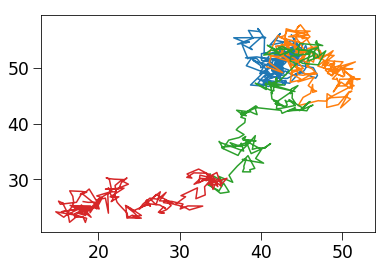

In [5]:
a, b, c = get_pathline_coordinates(2583)
plt.plot(a[-801:-601], b[-801:-601])
plt.plot(a[-601:-401], b[-601:-401])
plt.plot(a[-401:-201], b[-401:-201])
plt.plot(a[-201:-1], b[-201:-1])

2583


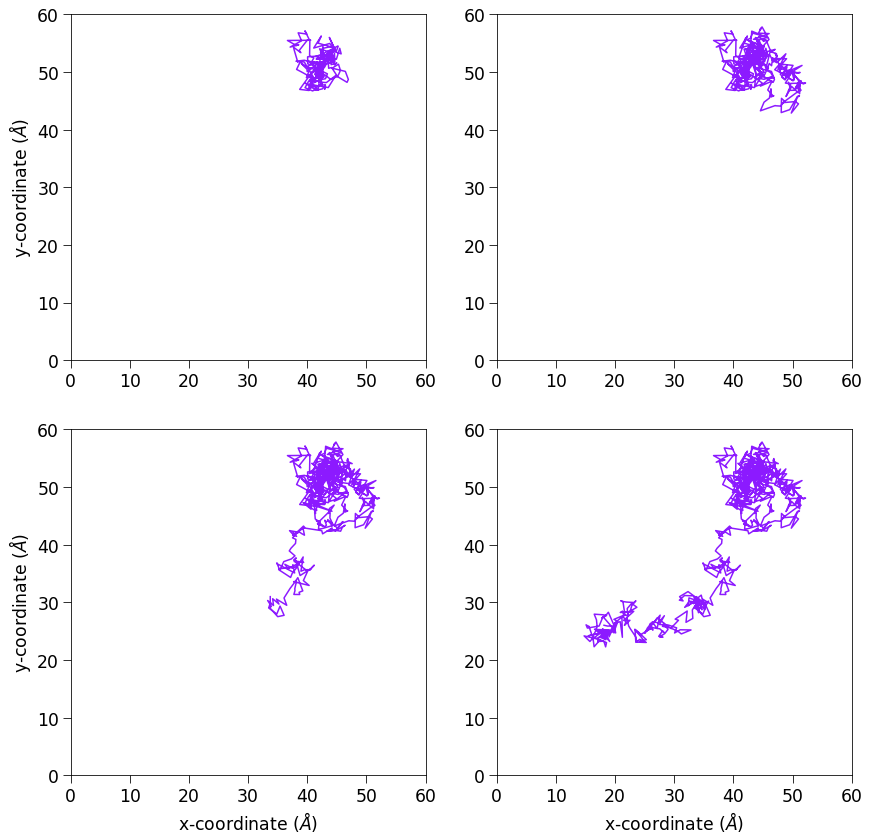

In [9]:
plt.figure(figsize=(14,14))
#plots of last 8 ns of simulation for atom 2583
#setting up grid for four plots
#2ns
grid = plt.GridSpec(2,2)
a, b, c = get_pathline_coordinates(2583)
plt.subplot(grid[0,0])
#plt.title('0-2 ns')
plt.plot(a[-801:-601], b[-801:-601], color=pu)
plt.ylabel('y-coordinate (' r'$\AA$)')
#plt.xlabel('x-coordinate (' r'$\AA$)')
plt.xlim(0,60)
plt.ylim(0, 60)

#4ns
plt.subplot(grid[0,1])
plt.plot(a[-801:-401], b[-801:-401], color=pu)
#plt.title('0-4 ns')
#plt.ylabel('y-coordinate (' r'$\AA$)')
#plt.xlabel('x-coordinate (' r'$\AA$)')
plt.xlim(0,60)
plt.ylim(0, 60)

#6ns
plt.subplot(grid[1,0])
plt.plot(a[-801:-201], b[-801:-201], color=pu)
#plt.title('0-6 ns')
plt.ylabel('y-coordinate (' r'$\AA$)')
plt.xlabel('x-coordinate (' r'$\AA$)')
plt.xlim(0,60)
plt.ylim(0, 60)

#8ns
plt.subplot(grid[1,1])
plt.plot(a[-801:-1], b[-801:-1], color=pu)
#plt.title('0-8 ns')
#plt.ylabel('y-coordinate (' r'$\AA$)')
plt.xlabel('x-coordinate (' r'$\AA$)')
plt.xlim(0,60)
plt.ylim(0, 60)

plt.savefig('/home/drez/Desktop/lipid_pathlines_figure.png', dpi=300)

13543


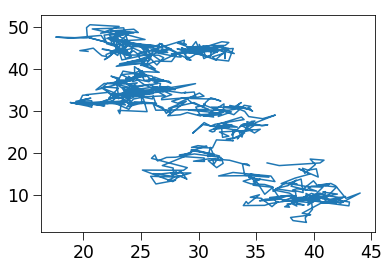

In [7]:
a, b, c = get_pathline_coordinates(13543)
plt.plot(a[0:801], b[0:801])

13543


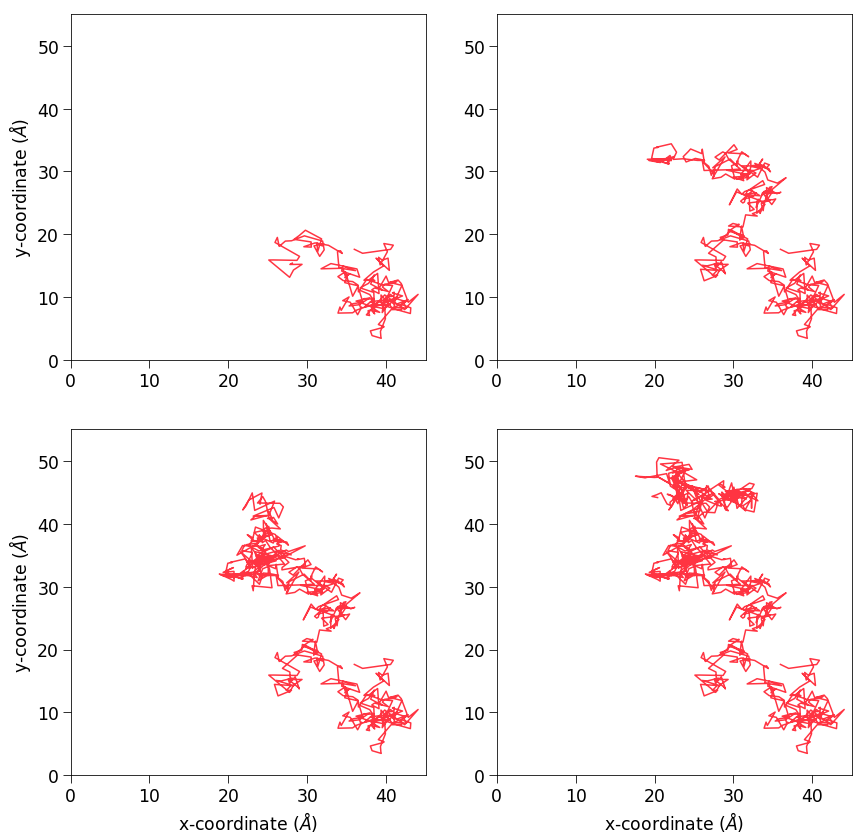

In [11]:
plt.figure(figsize=(14,14))
#plots of first 8 ns of simulation for atom 13543
#setting up grid for four plots
#2ns
grid = plt.GridSpec(2,2)
a, b, c = get_pathline_coordinates(13543)
plt.subplot(grid[0,0])
#plt.title('0-2 ns')
plt.plot(a[0:201], b[0:201], color=red)
plt.ylabel('y-coordinate (' r'$\AA$)')
#plt.xlabel('x-coordinate (' r'$\AA$)')
plt.xlim(0,45)
plt.ylim(0, 55)

#4ns
plt.subplot(grid[0,1])
plt.plot(a[0:401], b[0:401], color=red)
#plt.title('0-4 ns')
#plt.ylabel('y-coordinate (' r'$\AA$)')
#plt.xlabel('x-coordinate (' r'$\AA$)')
plt.xlim(0,45)
plt.ylim(0, 55)

#6ns
plt.subplot(grid[1,0])
plt.plot(a[0:601], b[0:601], color=red)
#plt.title('0-6 ns')
plt.ylabel('y-coordinate (' r'$\AA$)')
plt.xlabel('x-coordinate (' r'$\AA$)')
plt.xlim(0,45)
plt.ylim(0, 55)

#8ns
plt.subplot(grid[1,1])
plt.plot(a[0:801], b[0:801], color=red)
#plt.title('0-8 ns')
#plt.ylabel('y-coordinate (' r'$\AA$)')
plt.xlabel('x-coordinate (' r'$\AA$)')
plt.xlim(0,45)
plt.ylim(0, 55)

plt.savefig('/home/drez/Desktop/lipid_pathlines_figure2.png', dpi=300)